**Clustering avec Kmeans**

Les données à regrouper

**Clustering des données réelles**

Charger les données CSV employes.csv à partir de Google Drive

In [2]:
import pandas as pd

In [5]:
df_employes = pd.read_csv('employes (1).csv',index_col=0)
df_employes

,salaire,prime,etat civil,date recrutement
nom,,,,
Ali,1200.675,100.560,celibataire,20/10/2018
Sonia,2800.786,400.876,marie,30/11/2005
Rahma,NaN,130.987,celibataire,04/02/2017
Salma,2500.876,340.600,marie,03/02/2010
Ahmed,3100.760,NaN,marie,09/09/2004
Saleh,1300.876,150.900,celibataire,01/01/2017
Ameni,1100.660,130.870,celibataire,11/05/2019
Mehdi,3000.760,NaN,marie,07/07/2000
Salem,1505.760,159.700,celibataire,21/11/2017


In [17]:
df_.fillna({'salaire':df_['salaire'].mean(),'prime':df_['prime'].mean()},inplace=True)

In [18]:
df_['revenue']=df_.salaire + df_.prime

In [20]:
df_.drop(['salaire','prime'],axis=1,inplace=True)

In [21]:
df_

,etat civil,date recrutement,revenue
nom,,,
Ali,celibataire,20/10/2018,1301.235000
Sonia,marie,30/11/2005,3201.662000
Rahma,celibataire,04/02/2017,2323.069091
Salma,marie,03/02/2010,2841.476000
Ahmed,marie,09/09/2004,3357.925889
Saleh,celibataire,01/01/2017,1451.776000
Ameni,celibataire,11/05/2019,1231.530000
Mehdi,marie,07/07/2000,3257.925889
Salem,celibataire,21/11/2017,1665.460000


In [22]:
from datetime import datetime

In [24]:
df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])

C:\Users\nafkh\AppData\Local\Temp\ipykernel_1920\1179170739.py:1: UserWarning: Parsing '20/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
C:\Users\nafkh\AppData\Local\Temp\ipykernel_1920\1179170739.py:1: UserWarning: Parsing '30/11/2005' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
C:\Users\nafkh\AppData\Local\Temp\ipykernel_1920\1179170739.py:1: UserWarning: Parsing '21/11/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_['date recrutement'] = pd.to_datetime(df_['date recrutement'])
C:\Users\nafkh\AppData\Local\Temp\ipykernel_1920\1179170739.py:1: UserWarning: Parsing '19/02/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


In [25]:
df_['anciennete'] = df_['date recrutement'].apply(lambda date :datetime.now().year - date.year)

In [26]:
df_

,etat civil,date recrutement,revenue,anciennete
nom,,,,
Ali,celibataire,2018-10-20,1301.235000,4
Sonia,marie,2005-11-30,3201.662000,17
Rahma,celibataire,2017-04-02,2323.069091,5
Salma,marie,2010-03-02,2841.476000,12
Ahmed,marie,2004-09-09,3357.925889,18
Saleh,celibataire,2017-01-01,1451.776000,5
Ameni,celibataire,2019-11-05,1231.530000,3
Mehdi,marie,2000-07-07,3257.925889,22
Salem,celibataire,2017-11-21,1665.460000,5


In [28]:
df_.drop(['date recrutement'],axis=1,inplace=True)

In [29]:
df_

,etat civil,revenue,anciennete
nom,,,
Ali,celibataire,1301.235000,4
Sonia,marie,3201.662000,17
Rahma,celibataire,2323.069091,5
Salma,marie,2841.476000,12
Ahmed,marie,3357.925889,18
Saleh,celibataire,1451.776000,5
Ameni,celibataire,1231.530000,3
Mehdi,marie,3257.925889,22
Salem,celibataire,1665.460000,5


In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df_[['etat civil']])
ohe.categories_

[array(['celibataire', 'marie'], dtype=object)]

In [36]:
etat_civil_sparse = ohe.transform(df_[['etat civil']])
etat_civil = etat_civil_sparse.toarray()
etat_civil
df_etat_civil = pd.DataFrame(etat_civil,index=df_.index,columns=['etat civil celibataire','etat civil marié'])
df_ = pd.concat([df_,df_etat_civil],axis=1)

In [38]:
df_.drop(['etat civil'],axis=1,inplace= True)

In [39]:
df_

,revenue,anciennete,etat civil celibataire,etat civil marié
nom,,,,
Ali,1301.235000,4,1.0,0.0
Sonia,3201.662000,17,0.0,1.0
Rahma,2323.069091,5,1.0,0.0
Salma,2841.476000,12,0.0,1.0
Ahmed,3357.925889,18,0.0,1.0
Saleh,1451.776000,5,1.0,0.0
Ameni,1231.530000,3,1.0,0.0
Mehdi,3257.925889,22,0.0,1.0
Salem,1665.460000,5,1.0,0.0


Normaliser les données

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_)
X_ss = ss.transform(df_)
X_ss

array([[-1.1937301 , -0.97166562,  1.        , -1.        ],
       [ 0.78237727,  0.48583281, -1.        ,  1.        ],
       [-0.13120369, -0.85955036,  1.        , -1.        ],
       [ 0.40784765, -0.07474351, -1.        ,  1.        ],
       [ 0.94486403,  0.59794807, -1.        ,  1.        ],
       [-1.03719413, -0.85955036,  1.        , -1.        ],
       [-1.26621095, -1.08378088,  1.        , -1.        ],
       [ 0.84088175,  1.04640913, -1.        ,  1.        ],
       [-0.81500063, -0.85955036,  1.        , -1.        ],
       [ 0.67700994,  1.15852439, -1.        ,  1.        ],
       [-1.03057057, -0.63531983,  1.        , -1.        ],
       [ 1.82092943,  2.05544651, -1.        ,  1.        ]])

Réduire les dimensions des données

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_ss)
X_ss_pca = pca.transform(X_ss)
X_ss_pca

array([[-2.08283845, -0.070833  ],
       [ 1.63874567, -0.38377126],
       [-1.49652918,  0.3748481 ],
       [ 1.17638784, -0.87305816],
       [ 1.77501009, -0.25506935],
       [-1.94954959,  0.05577314],
       [-2.17409741, -0.16783631],
       [ 1.94308214, -0.00578323],
       [-1.83844666,  0.13402604],
       [ 1.91615821,  0.00798055],
       [-1.83620459,  0.20105933],
       [ 2.92828192,  0.98266416]])

Regrouper les données clusters avec Kmeans

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0).fit(X_ss_pca)
kmeans.labels_
labels = kmeans.predict(X_ss_pca)
labels

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [58]:
cluster0 = X_ss_pca[labels==0,:]
cluster1 = X_ss_pca[labels==1,:]

Visualiser les données sur un plan 2D colorées selon leurs appartenances aux clusters

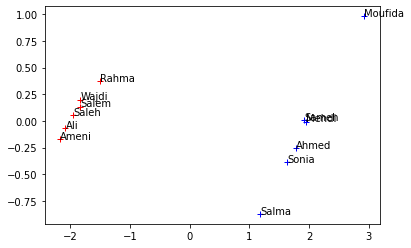

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster0[:,0],cluster0[:,1],'r+', label='Cluster 0')
plt.plot(cluster1[:,0],cluster1[:,1],'b+', label='Cluster 1')

for nom, x, y in zip(df_employes.index,X_pca[:,0],X_pca[:,1]):
  plt.annotate(nom, xy =(x, y), xycoords="data")